# Compare the analytical solution and the neural net mask

In [598]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [599]:
import sys
sys.path.append("..")
from utils.model import Net_mask
from utils.data import Data
#from scripts import data_example as dem
import torch
import numpy as np
import matplotlib.pyplot as plt
from scripts.parameters import get_parameters
import scripts.parameters as par
from utils.loss2 import Loss

In [600]:
model = Net_mask()
outer_folder = 'A_default'
run = 0
name = '../saved_models/' + str(outer_folder) + '/' + str(run) + '/model_weights.pth'
model.load_state_dict(torch.load(name))
model.eval()

Net_mask(
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=10, bias=True)
  )
)

In [601]:
tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps, tensor_Q_m, sigma2_eps, tau2 = par.get_parameters_1()
data1 = Data(tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps)
loss = Loss(tensor_Q_m, sigma2_eps, 1)

In [602]:
tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps, tensor_Q_m, sigma2_eps, tau2 = par.get_parameters_2()
data2 = Data(tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps)
#loss = Loss(tensor_Q_m, sigma2_eps, 1)

(tensor(6.8856), tensor([0.1754, 6.7102]))
(tensor(7.4103), tensor([0.4115, 6.9988]))


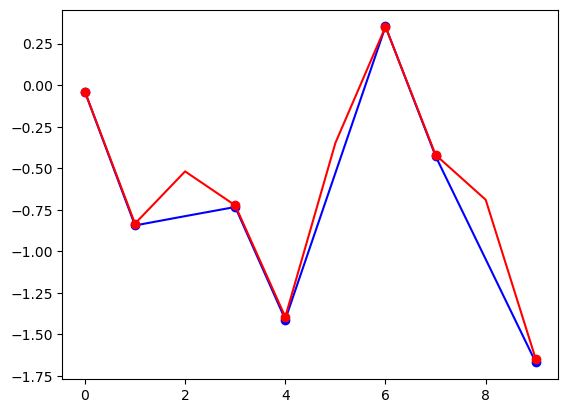

In [612]:
input_tensor_raw = data1.get_tensor_data(1)
input_tensor = input_tensor_raw[0]
post_mean1, post_cov1 = data1.get_tensor_posterior(input_tensor)
post_mean2, post_cov2 = data2.get_tensor_posterior(input_tensor)
d = input_tensor[:10]
mask = input_tensor[10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]

post1 = torch.unsqueeze(post_mean1, 0)
post2 = torch.unsqueeze(post_mean2, 0)
#out = model(input_tensor_raw)
print(loss.loss(input_tensor_raw, post1))
print(loss.loss(input_tensor_raw, post2))
#print(loss.loss(input_tensor_raw, out))

plt.plot(range(10), post_mean1, 'b')
plt.plot(location, post_mean1[location], 'bo')
plt.plot(range(10), post_mean2, 'r')
plt.plot(location, post_mean2[location], 'ro')
#plt.plot(range(10), out[0].detach().numpy(), 'g')
#plt.plot(location, out[0].detach().numpy()[location], 'go')

(tensor(2.), tensor([0., 2.]))
(tensor(0.), tensor([0., 0.]))
(tensor(8.1873e-05), tensor([9.8371e-07, 8.0890e-05]))
(tensor(0.9022), tensor([0.0478, 0.8544]))


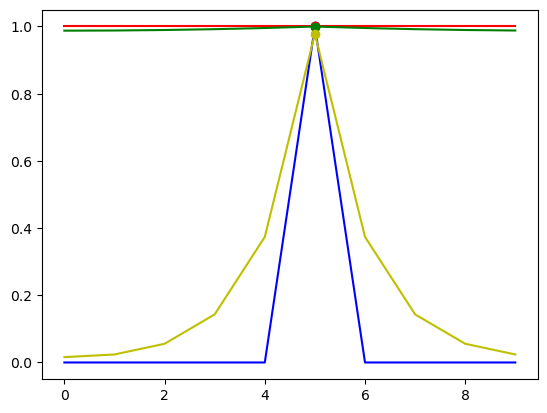

In [604]:
#input_tensor_raw = data1.get_tensor_data(1)
#input_tensor = input_tensor_raw[0]
input_tensor = torch.zeros(20)
input_tensor[5] = 1
input_tensor[15] = 1
p1, post_cov1 = data1.get_tensor_posterior(input_tensor)
p2, post_cov2 = data2.get_tensor_posterior(input_tensor)
post_mean1 = torch.zeros(10)
post_mean1[5] = 1
post_mean2 = torch.ones(10)
d = input_tensor[:10]
mask = input_tensor[10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]

post1 = torch.unsqueeze(post_mean1, 0)
post2 = torch.unsqueeze(post_mean2, 0)
post3 = torch.unsqueeze(p1, 0)
post4 = torch.unsqueeze(p2, 0)
input_tensor_raw = torch.unsqueeze(input_tensor, 0)
print(loss.loss(input_tensor_raw, post1)) # 0 alle steder unntatt 6
print(loss.loss(input_tensor_raw, post2)) # 1 alle steder
print(loss.loss(input_tensor_raw, post3)) # straight lines, penalizes derivative
print(loss.loss(input_tensor_raw, post4)) # buet shape

plt.plot(range(10), post_mean1, 'b')
plt.plot(location, post_mean1[location], 'bo')
plt.plot(range(10), post_mean2, 'r')
plt.plot(location, post_mean2[location], 'ro')

plt.plot(range(10), p1, 'g')
plt.plot(location, p1[location], 'go')
plt.plot(range(10), p2, 'y')
plt.plot(location, p2[location], 'yo')